## Impact of Goalkeeper on Team Possession Play

What impact does a GK have on a team's possession play?

We will consider match-by-match data for Liverpool in 2019-20, when an injury to first choice GK Alisson caused Adrian to start 7 consecutive Premier League (PL) matches in goal, and a subsequent suspension to Alisson caused Adrian to start a further match. We will investigate differences in the data between matches where Adrian played 90 minutes and matches where Alisson played 90 minutes. Matches where both GKs were involved will be excluded

This investigation will rely on several major assumptions:
- Liverpool players involved other than the GK were broadly the same with both GKs
- Opposition teams were broadly of similar quality for matches started by both GKs
- Liverpool did not majorly alter their broader tactical approach
- Opposition did not majorly alter their tactical approaches due to change in GK

The first and second assumptions are, at least partly, testable. We can see from lineups on [fbref](https://fbref.com/en/squads/822bd0ba/2019-2020/matchlogs/c9/schedule/Liverpool-Scores-and-Fixtures-Premier-League) that Liverpool did not make sweeping team changes depending on the goalkeeper, although some rotation did occur. We will consider opposition strength when analysing the split data

The third and fourth assumptions are more difficult to validate and therefore will be assumed, but do represent a caveat to the findings below and, alongside limitations like sample size, mean that this is first and foremost a correlation analysis which does not necessarily seek to identify causation

[autoscout](https://github.com/olliestanley/autoscout) will be used as the primary analysis tool with data from StatsBomb via fbref

In [1]:
from autoscout.util import load_csv

MATCHES_DATA_FOR = "data/lfc_2020/Liverpool_for.csv"
MATCHES_DATA_VS = "data/lfc_2020/Liverpool_vs.csv"

df_for, df_vs = load_csv(MATCHES_DATA_FOR), load_csv(MATCHES_DATA_VS)

df_for = df_for[df_for["comp"] == "Premier League"]
df_vs = df_vs[df_vs["comp"] == "Premier League"]

If you do not have the data already, it can be obtained using a script from `autoscout` named `download_fbref_match.py`

## Data Selection

Here we manually select the matches we want to categorise into each set. We define each list separately, rather than defining one as the inverse of the other, to miss matches where both played and also to not consider some matches later in the season

Notable matches excluded are:

- 2019-08-09, vs Norwich, both keepers played due to Alisson suffering an injury
- 2019-11-30, vs Brighton, both keepers played due to Alisson receiving a red card

Otherwise, all PL matches until January are selected. Extending this cut-off to mid-March (just prior to the PL being suspended for COVID-19) would allow including 1 additional match played by Adrian, and 9 additional matches started by Alisson. However, this would mean the majority of Alisson's data points being separated in time from Adrian's, introducing more potential for patterns or trends driven by time appearing to be driven by GK choice. As such the earlier cut-off was selected, but this does have the downside of providing a smaller sample

In [2]:
adrian_dates = ["2019-08-17", "2019-08-24", "2019-08-31", "2019-09-14", "2019-09-22", "2019-09-28", "2019-10-05", "2019-12-04"]
alisson_dates = ["2019-10-20", "2019-10-27", "2019-11-02", "2019-11-10", "2019-11-23", "2019-12-07", "2019-12-14", "2019-12-26", "2019-12-29"]

df_for_adrian = df_for[df_for["date"].isin(adrian_dates)]
df_vs_adrian = df_vs[df_vs["date"].isin(adrian_dates)]

df_for_alisson = df_for[df_for["date"].isin(alisson_dates)]
df_vs_alisson = df_vs[df_vs["date"].isin(alisson_dates)]

With the data filtered, we will take a look at some summary statistics for matches played by each GK to verify the data is as expected

In [3]:
df_for_adrian.describe()

,xg_for,xg_against,possession,goals,pens_made,pens_att,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,...,gk_def_actions_outside_pen_area,gk_avg_distance_def_actions,gk_shots_on_target_against,gk_saves,gk_save_pct,gk_clean_sheets,gk_pens_att,gk_pens_allowed,gk_pens_saved,gk_pens_missed
count,8.00000,8.000000,8.00000,8.000000,8.00000,8.00000,8.000000,8.000000,8.00000,8.000000,...,8.000000,8.00000,8.000000,8.000000,8.000000,8.00000,8.0,8.0,8.0,8.0
mean,2.00000,0.925000,59.50000,2.500000,0.25000,0.25000,15.500000,5.250000,0.25000,36.462500,...,0.625000,11.55000,2.250000,1.375000,54.175000,0.25000,0.0,0.0,0.0,0.0
std,0.78011,0.565054,9.50188,1.195229,0.46291,0.46291,5.424811,1.669046,0.46291,10.982836,...,0.916125,4.09878,1.035098,0.916125,38.578927,0.46291,0.0,0.0,0.0,0.0
min,0.90000,0.100000,45.00000,1.000000,0.00000,0.00000,6.000000,3.000000,0.00000,16.700000,...,0.000000,4.00000,1.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
25%,1.32500,0.400000,52.75000,2.000000,0.00000,0.00000,14.000000,4.000000,0.00000,31.225000,...,0.000000,9.85000,1.750000,0.750000,37.500000,0.00000,0.0,0.0,0.0,0.0
50%,2.20000,1.050000,60.00000,2.000000,0.00000,0.00000,15.500000,5.000000,0.00000,40.000000,...,0.000000,11.80000,2.000000,2.000000,58.350000,0.00000,0.0,0.0,0.0,0.0
75%,2.70000,1.350000,64.75000,3.000000,0.25000,0.25000,17.750000,6.250000,0.25000,42.275000,...,1.250000,13.25000,3.000000,2.000000,75.025000,0.25000,0.0,0.0,0.0,0.0
max,2.80000,1.600000,73.00000,5.000000,1.00000,1.00000,24.000000,8.000000,1.00000,50.000000,...,2.000000,18.00000,4.000000,2.000000,100.000000,1.00000,0.0,0.0,0.0,0.0


In [4]:
df_for_alisson.describe()

,xg_for,xg_against,possession,goals,pens_made,pens_att,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,...,gk_def_actions_outside_pen_area,gk_avg_distance_def_actions,gk_shots_on_target_against,gk_saves,gk_save_pct,gk_clean_sheets,gk_pens_att,gk_pens_allowed,gk_pens_saved,gk_pens_missed
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.0,9.0,9.0
mean,1.866667,0.822222,63.555556,2.222222,0.222222,0.222222,15.444444,6.000000,0.222222,38.688889,...,1.111111,16.700000,2.333333,1.777778,58.333333,0.444444,0.0,0.0,0.0,0.0
std,0.768115,0.489331,8.647415,0.971825,0.440959,0.440959,5.433947,2.828427,0.440959,9.934340,...,0.927961,4.859269,1.870829,1.563472,37.728935,0.527046,0.0,0.0,0.0,0.0
min,1.000000,0.100000,45.000000,1.000000,0.000000,0.000000,10.000000,3.000000,0.000000,24.000000,...,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,1.200000,0.600000,59.000000,2.000000,0.000000,0.000000,11.000000,4.000000,0.000000,35.700000,...,0.000000,15.000000,2.000000,1.000000,50.000000,0.000000,0.0,0.0,0.0,0.0
50%,1.600000,0.700000,66.000000,2.000000,0.000000,0.000000,14.000000,5.000000,0.000000,37.500000,...,1.000000,16.200000,2.000000,2.000000,66.700000,0.000000,0.0,0.0,0.0,0.0
75%,2.500000,1.300000,68.000000,3.000000,0.000000,0.000000,20.000000,6.000000,0.000000,41.700000,...,2.000000,17.600000,3.000000,2.000000,83.300000,1.000000,0.0,0.0,0.0,0.0
max,3.100000,1.400000,74.000000,4.000000,1.000000,1.000000,25.000000,12.000000,1.000000,60.000000,...,2.000000,27.700000,6.000000,5.000000,100.000000,1.000000,0.0,0.0,0.0,0.0


Many of the columns in the dataset will not be useful to us, so the next step is to build a subset of the data containing the columns we are interested in. We want to retain columns which may provide any insight into goalkeeping style, goalkeeping ability, or the success of the team in possession

The entire dataset contains 160+ columns so we will not list all of them here, instead we will filter to a pre-selected list of relevant columns. We focus on team metrics relating to passing, pressures, and progression, alongside goalkeeper metrics relating to passing and defensive actions

The `vs` data is not filtered to only these columns as we will not focus on analysing it, although it may provide useful additional context when investigating in more depth

In [5]:
columns = [
    "opponent", "date", "npxg", "xg_against", "gk_psxg_net", "possession", "shots_total", "passes", "passes_pct", "passes_progressive_distance", "passes_short", "passes_medium",
    "passes_long", "passes_into_final_third", "progressive_passes", "through_balls", "passes_low", "passes_high", "passes_switches", "passes_pressure", "passes_ground", "pressures",
    "pressure_regains", "pressures_def_3rd", "pressures_mid_3rd", "pressures_att_3rd", "gk_passes_launched", "gk_passes_completed_launched",
    "gk_passes", "gk_passes_length_avg", "gk_crosses_stopped", "gk_crosses_stopped_pct", "gk_crosses", "gk_def_actions_outside_pen_area", "gk_avg_distance_def_actions"
]

df_for_adrian = df_for_adrian[columns]
df_for_alisson = df_for_alisson[columns]

## Relative Strength of Schedule

Next we will take a look at relative "strength of schedule" for the two goalkeepers using a very basic analysis. This analysis does not account for injuries, suspensions, or form at the time(s) Liverpool played each opponent, only the final league position in the season for that opponent. A better strength of schedule analysis could also use underlying performance metrics over league positions

In [6]:
df_for_adrian.opponent

3        Southampton
4            Arsenal
5            Burnley
6      Newcastle Utd
8            Chelsea
10     Sheffield Utd
12    Leicester City
23           Everton
Name: opponent, dtype: object

Southampton (11th), Arsenal (8th), Burnley (10th), Newcastle (13th), Chelsea (4th), Sheffield (9th), Leicester (5th), Everton (12th) have an average placement of 9th in 2019-20

In [7]:
df_for_alisson.opponent

13     Manchester Utd
15          Tottenham
17        Aston Villa
19    Manchester City
20     Crystal Palace
24        Bournemouth
26            Watford
28     Leicester City
29             Wolves
Name: opponent, dtype: object

Manchester Utd (3rd), Tottenham (6th), Aston Villa (17th), Manchester City (2nd), Crystal Palace (14th), Bournemouth (18th), Watford (19th), Leicester (5th), Wolves (7th) have an average placement of 10th in 2019-20

This suggests Alisson had a slightly easier run of matches than Adrian. Noticeably, there is a greater variation in opposition strength for Alisson than for Adrian. One interesting possibility for correcting for this could be to replace the matches sampled for Alisson with the reverse fixtures of the matches played by Adrian

## Goalkeeping Styles and Performance

In [8]:
from typing import Any, Dict
import pandas as pd
import matplotlib.pyplot as plt
from autoscout.util import load_json
from autoscout.vis import radar

The first real analysis is to determine how stark a difference in goalkeeping style Liverpool encountered when using Adrian

We will plot some basic radar charts to get a feel for big picture differences

In [9]:
gk_config = load_json("data/gk_radar_config.json")

As we want to use data aggregated across a few matches for these radars, rather than data for the whole season, we need to build the aggregates ourselves from the match-by-match data

In [10]:
def process_data_for_gk_radar(df: pd.DataFrame, radar_config: Dict[str, Any]) -> pd.DataFrame:
    processed_df = pd.DataFrame.from_dict({
        col: [
            df[col].sum() if conf["normalize"] else df[col].mean(),
        ]
        for (col, conf) in radar_config["columns"].items()
    })

    processed_df["minutes"] = len(df) * 90
    return processed_df

df_radar_adrian = process_data_for_gk_radar(df_for_adrian, gk_config)
df_radar_alisson = process_data_for_gk_radar(df_for_alisson, gk_config)

With the data prepared we can plot a radar chart for each goalkeeper

### Adrian

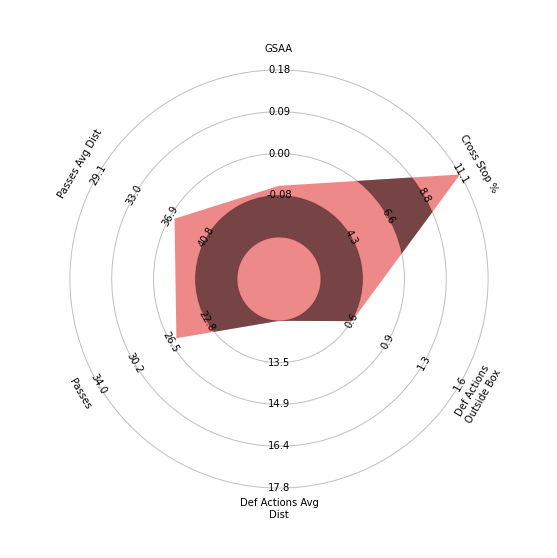

In [11]:
rdr, fig, ax = radar.plot_radar_from_config(df_radar_adrian, gk_config, index=0)
plt.show()

### Alisson

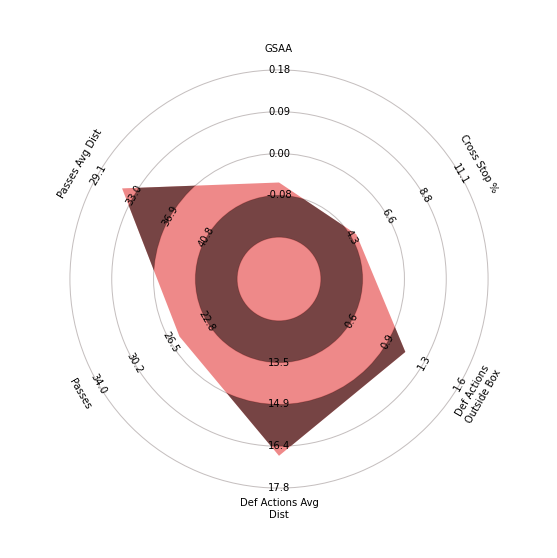

In [12]:
rdr, fig, ax = radar.plot_radar_from_config(df_radar_alisson, gk_config, index=0)
plt.show()

Neither keeper excelled in shot stopping over the period, but this is not of too much importance for this analysis. As expected, Alisson was a much more active defender, coming out of his box much more than Adrian. Interestingly, Adrian was a much more successful cross-stopper, which means in one regard he was actually more defensively active than his counterpart

Alisson additionally passed much shorter than Adrian, suggesting the latter was less confident on the ball. Positively for our earlier assumptions, the total number of passes per 90 for each was similar, suggesting Liverpool did not avoid building up using the goalkeeper due to the change in personnel

## Changes in Team Possession Play

This overview provides the basis for the investigation. Working from the belief that Adrian was a less active defender who engaged in less short passing, we can begin to analyse the differences in team possession play to see whether the change in goalkeeping style was accompanied by significant changes in the team as a whole

It is important to note that this cannot be described as a causal analysis by any means. That would require more data as well as more sophisticated research design. Instead, we can only observe correlations here

We will build some metrics which may be useful to compare before going on to numerical comparisons

In [13]:
def build_comparison_metrics(df: pd.DataFrame):
    df["pct_passes_short"] = df["passes_short"] / df["passes"]
    df["pct_passes_medium"] = df["passes_medium"] / df["passes"]
    df["pct_passes_long"] = df["passes_long"] / df["passes"]

    df["pct_passes_ground"] = df["passes_ground"] / df["passes"]
    df["pct_passes_low"] = df["passes_low"] / df["passes"]
    df["pct_passes_high"] = df["passes_high"] / df["passes"]

    df["pct_pressures_def"] = df["pressures_def_3rd"] / df["pressures"]
    df["pct_pressures_mid"] = df["pressures_mid_3rd"] / df["pressures"]
    df["pct_pressures_att"] = df["pressures_att_3rd"] / df["pressures"]

build_comparison_metrics(df_for_adrian)
build_comparison_metrics(df_for_alisson)

Define a list of columns to compare

In [14]:
compare_columns = [
    "possession", "passes_pct", "passes_progressive_distance", "pct_passes_short", "pct_passes_medium", "pct_passes_long", "passes_into_final_third", "progressive_passes",
    "through_balls", "pct_passes_low", "pct_passes_high", "pct_passes_ground", "passes_switches", "passes_pressure", "pressures", "pressure_regains", "pct_pressures_def",
    "pct_pressures_mid", "pct_pressures_att"
]

We have a lot of columns, so just look at some summary statistics for now

In [19]:
def r(v):
    return round(v, 2)

print("Adrian vs Alisson")

for compare_col in compare_columns:
    print(f"{compare_col} | Mean: {r(df_for_adrian[compare_col].mean())} vs {r(df_for_alisson[compare_col].mean())} | Std: {r(df_for_adrian[compare_col].std())} vs {r(df_for_alisson[compare_col].std())}")

Adrian vs Alisson
possession | Mean: 59.5 vs 63.56 | Std: 9.5 vs 8.65
passes_pct | Mean: 80.75 vs 82.79 | Std: 5.29 vs 2.93
passes_progressive_distance | Mean: 3138.62 vs 3408.0 | Std: 509.08 vs 483.34
pct_passes_short | Mean: 0.34 vs 0.34 | Std: 0.02 vs 0.05
pct_passes_medium | Mean: 0.4 vs 0.42 | Std: 0.03 vs 0.03
pct_passes_long | Mean: 0.23 vs 0.21 | Std: 0.03 vs 0.03
passes_into_final_third | Mean: 42.0 vs 44.33 | Std: 18.81 vs 13.32
progressive_passes | Mean: 45.38 vs 47.44 | Std: 13.48 vs 13.07
through_balls | Mean: 3.12 vs 2.22 | Std: 1.96 vs 2.11
pct_passes_low | Mean: 0.15 vs 0.16 | Std: 0.04 vs 0.03
pct_passes_high | Mean: 0.21 vs 0.19 | Std: 0.06 vs 0.04
pct_passes_ground | Mean: 0.64 vs 0.65 | Std: 0.08 vs 0.05
passes_switches | Mean: 23.0 vs 22.44 | Std: 5.88 vs 6.37
passes_pressure | Mean: 98.0 vs 110.33 | Std: 27.64 vs 31.14
pressures | Mean: 159.5 vs 167.56 | Std: 42.69 vs 56.36
pressure_regains | Mean: 48.25 vs 50.67 | Std: 9.59 vs 14.92
pct_pressures_def | Mean: 0.29

### Key takeaways

- Possession and pass completion were significantly higher, and less varied between matches, with Alisson in goal
- Liverpool were able to progress the ball a greater distance per match, and pass into the final third more often, with Alisson in goal
- Slightly more of the team's passes were long with Adrian in goal
- Slightly more of the team's pressures were in the final third with Alisson in goal, as well as more pressures and pressure regains in total

This is consistent with what we would expect. When a team has a more active goalkeeper who is more comfortable on the ball, they are able to hold onto the ball more and can press higher up the pitch

## Next steps

With more time I would like to convert some of this simple data printing to visualised analysis and look at distributions rather than simple summary statistics. Some other metrics could also be included or engineered

It would be interesting to repeat this analysis using different data samples, such as another team which faced a similar scenario. It may also be interesting to replace the Alisson data sample in this analysis with the reverse fixtures of the matches played by Adrian, to attempt to reduce the effect of differing oppositions